WINDOW SPLIT

In [ ]:
from src.execution import WindowSplittingExecution

In [ ]:
DATA: str = "assets/data/real-data.csv"
VALIDATION_SPLIT: bool = True # If the data should also be splitted into a validation set?
TEST_SIZE: float = 0.4
BATCH_SPLIT: bool = True
BATCHSIZE: int = 1800 # real-data: 1800, synthetic-data: 326
SEED: int = 6378 # Seed for random state -> Split with same seed and data will always result in the same split
INTERPOLATION: bool = False
WINDOWSIZE: int = 10
SEP: str = ";" # Separator of the csv file
DECIMAL: str = "," # Decimal separator of the csv file


WindowSplittingExecution.execute(DATA, 
                                 BATCH_SPLIT, 
                                 VALIDATION_SPLIT, 
                                 TEST_SIZE, 
                                 SEED, 
                                 BATCHSIZE, 
                                 INTERPOLATION, 
                                 WINDOWSIZE, 
                                 SEP, 
                                 DECIMAL)

TUNE MODEL

In [ ]:
from src.execution import CNNTuningExecution

In [ ]:
import os

folders = sorted([f.path for f in os.scandir("build/window_split/tune_test") if f.is_dir()])

for folder in folders:
    CNNTuningExecution.execute(folder)


In [ ]:
from src.experiment import MultipleCNNTrainingExperiment
from src.execution import CNNTrainingExecution
import json
import os

data_folders = sorted([f.path for f in os.scandir("build/tune/tune_test") if f.is_dir()])

for folder in data_folders:
    best_hp = json.load(open(f"{folder}/best-hyperparameters.json", "r"))
    meta= json.load(open(f"{folder}/metadata.json", "r"))

    CNNTrainingExecution.execute(f"{folder}/best-model.h5", meta["data"], "cnn.h5", best_hp["learning_rate"])

TRAIN MODEL

In [ ]:
from src.execution import CNNTrainingExecution
import os
import json

In [ ]:
DATA_FOLDER = "build/window_split/real-data/1744034830"
SAVE_FILENMAME = "cnn.h5" # With file extension

data_folders = sorted([f.path for f in os.scandir("build/tune/tune_test") if f.is_dir()])

for folder in data_folders:
    best_hp = json.load(open(f"{folder}/best-hyperparameters.json", "r"))

    CNNTrainingExecution.execute(f"{folder}/best-model.h5", DATA_FOLDER, "cnn.h5", best_hp["learning_rate"])

VALIDATE MODEL

In [ ]:
from src.execution import CNNValidationExecution 

In [ ]:
MODEL_FOLDER = "build/soft-start/cnn/1743863962"
DATA_FOLDER = "build/window_split/real-data/1743522733"

CNNValidationExecution.execute(MODEL_FOLDER, DATA_FOLDER)

In [ ]:
from src.execution import CNNSoftStartExecution

In [ ]:
MODEL_FILE = "build/train/cnn-synthetic-data-offset/1742244525/cnn-synthetic-offset.h5"
DATA_FOLDER = "build/window_split/real-data/1742552872"
SAVE_FILENAME = "cnn-retrained.h5"
LEARNING_RATE = 0.000029335291375872573

CNNSoftStartExecution.execute(MODEL_FILE, DATA_FOLDER, SAVE_FILENAME, LEARNING_RATE)

In [ ]:
from src.experiment import MultipleCNNTrainingExperiment

In [ ]:
MultipleCNNTrainingExperiment.start(N=3, 
                                    test_size=0.8, 
                                    model_file="assets/models/untrained/sim_data_preprocessed_offset_multiplitiv/1743667824/best-model.h5", 
                                    data_file="assets/data/upsampled/sim_data_preprocessed_upsampled.csv",
                                    learning_rate=0.0005110140569138342, 
                                    generate_new_split=True,
                                    sep=";",
                                    decimal=".", 
                                    batchsize=1800, 
                                    batch_split=True, 
                                    interpolation=False)

In [ ]:
from src.experiment import SoftStartExperiment

In [ ]:
import os 

DATA_FOLDER = "build/window_split/real-data-20"
MODEL_FOLDER = "assets/models/trained/syn-off-mul-80-syn"



data_folders = sorted([f.path for f in os.scandir(DATA_FOLDER) if f.is_dir()])
model_folders = sorted([f.path for f in os.scandir(MODEL_FOLDER) if f.is_dir()])

for model_folder in model_folders:
    for data_folder in data_folders:
        SoftStartExperiment.run(model_file=f"{model_folder}/cnn.h5", 
                            data_folder=data_folder,
                            lr_factors=[1, 0.1],
                            unfreezed_layers=[3, 12])

In [ ]:
from src.experiment import MultipleCNNValidationExperiment

VALIDATEEEEE

In [ ]:
import os
from src.experiment import MultipleCNNValidationExperiment
N = 8
MAKE_VALIDATION = True

MultipleCNNValidationExperiment.start("build/train/diff-models-trained-on-same-80", N, MAKE_VALIDATION, None)



In [ ]:
from src.execution import CNNValidationExecution

In [ ]:
import os

DATA_FOLDER = "build/window_split/real-data-20"
N = 10

for data_folder in DATA_FOLDER:
    folders = sorted([f.path for f in os.scandir(DATA_FOLDER) if f.is_dir()])

for data_folder in folders[-N:]:
    CNNValidationExecution.execute(model_folder="", 
                                   data_folder=data_folder)


In [ ]:
import os
import json
import pandas as pd
from pandas import DataFrame


FOLDER = "build/validate/real-20-real"
folders = sorted([f.path for f in os.scandir(FOLDER) if f.is_dir()])

df = DataFrame(columns=["Verstellweg_Phi_loss", 
                        "Verstellweg_Phi_mean_absolute_error", 
                        "Verstellweg_X_loss", 
                        "Verstellweg_X_mean_absolute_error",
                        "Verstellweg_Y_loss",
                        "Verstellweg_Y_mean_absolute_error",
                        "loss"])

for folder in folders:
    with open(os.path.join(folder, "validation_results.json"), "r") as file:
        d = json.load(file)
        results = d["results"]
        df = pd.concat([df, pd.DataFrame([results])], ignore_index=True)

# Calculate mean and variance for each column
mean_values = df.mean()
variance_values = df.std()

print("Mean values:")
print(mean_values)

print("\nStd values:")
print(variance_values)


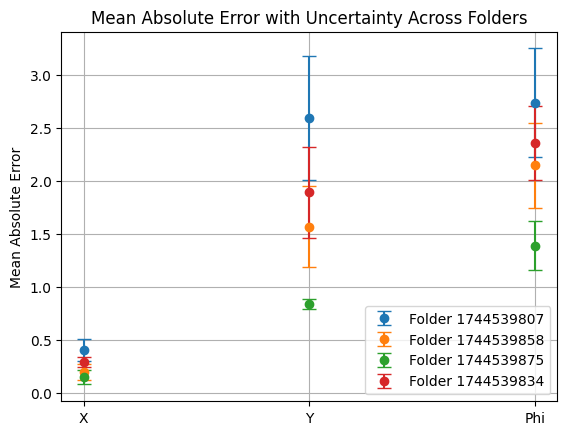

In [2]:
from src.show import plot_mean_with_uncertainty

plot_mean_with_uncertainty("build/validate_average/plot-this")